# Generar datos con corrimiento al rojo

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [52]:
#funcion obtener distancias
def dist(x_d,x_r,y_d,y_r):
    dis=np.sqrt((x_d - x_r)**2 + (y_d-y_r)**2)
    return dis

L=20 #tamanio caja
vecind=L/10 #vecindad a analizar
np.random.seed(0)
vel=0.8


#bins
bins=np.linspace(0.,np.sqrt(2.)*L,20)

#arreglo  datos disco en polares
N1=1000 #puntos de datos
ND_D=N1*(N1-1)/2 #distancias datos
ri=0.5 #radio interior
re=1. #radio exterior

c_x=0.0 #centrado x
c_y=0.0 #centrado y

#crear disco
r_ani=2*np.pi*np.random.uniform(ri,re,N1)#*L  #puntos sobre radio anillo
phi= 2 * np.pi * np.random.rand(N1) #angulo polares
x_d= r_ani*np.cos(phi)+c_x #coordenada x
y_d=r_ani*np.sin(phi)+c_y #coordenada y




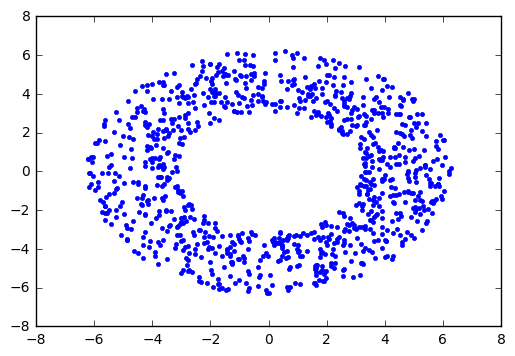

In [53]:
plt.plot(x_d,y_d,'.')

In [54]:
y_shift=np.zeros(N1) #arreglo de puntos con redshift

for i in range(N1):
    d_min=np.infty
    for j in range(i+1,N1):
        d_prueb= dist(x_d[i],x_d[j],y_d[i],y_d[j])
        if (d_prueb<L/10 and d_min>d_prueb):
            d_min=d_prueb
            y_shift[i]=y_d[i]+d_min*vel
            

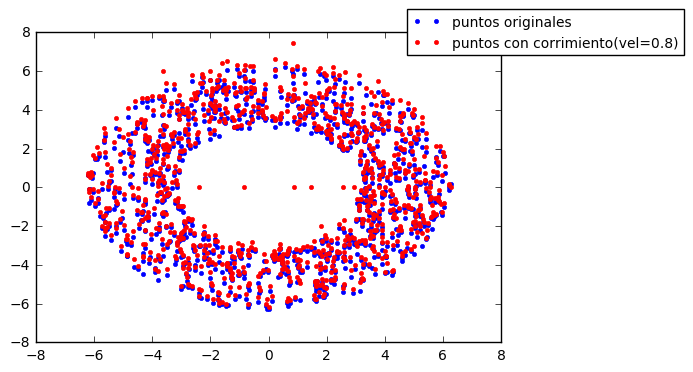

In [58]:
plt.plot(x_d,y_d,'.',label='puntos originales')
plt.plot(x_d,y_shift,'.',label='puntos con corrimiento(vel=0.8)',c='r')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})

# Funcion de correlacion anisotropica

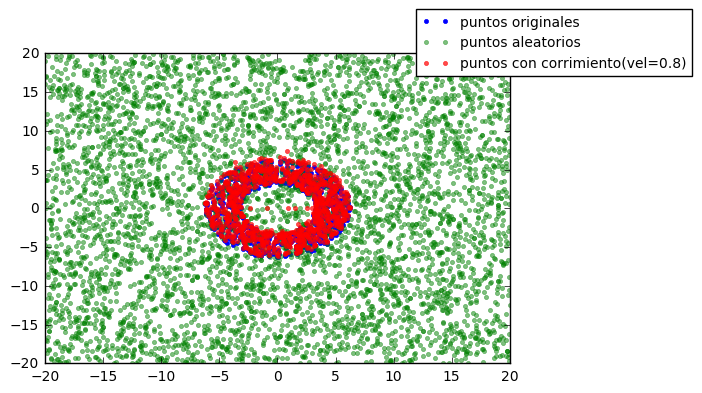

In [65]:
#definir arreglo de aleatorios
N2=5*N1
x_r = L*np.random.uniform(-1.,1.,N2)
y_r= L*np.random.uniform(-1.,1.,N2)
plt.plot(x_d,y_d,'.',label='puntos originales')
plt.plot(x_r,y_r,'.',label='puntos aleatorios',c='g',alpha=0.5)
plt.plot(x_d,y_shift,'.',label='puntos con corrimiento(vel=0.8)',c='r',alpha=0.7)
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})

In [67]:
#parametros
ND_D=N1*(N1-1)/2 #distancias datos
ND_R=N2*(N2-1)/2 #distancias aleatorios
ND_DR=N1*N2 #distancias entre datos y aleatorios

#creacion lista para correlacion
dis_DD=[]
dis_RR=[]
dis_DR=[]



In [68]:
#obtener distancias

#DD
for i in range(N1):
    for j in range(i+1,N1):
        dd = dist(x_d[i],x_d[j],y_shift[i],y_shift[j])
        dis_DD.append(dd)
#RR
for i in range(N2):
    for j in range(i+1,N2):
        rr = dist(x_r[i],x_r[j],y_r[i],y_r[j])
        dis_RR.append(rr)
#DR
for i in range(N1):
    for j in range(i+1,N2):
        dr = dist(x_d[i],x_r[j],y_shift[i],y_r[j])
        dis_DR.append(dr) 


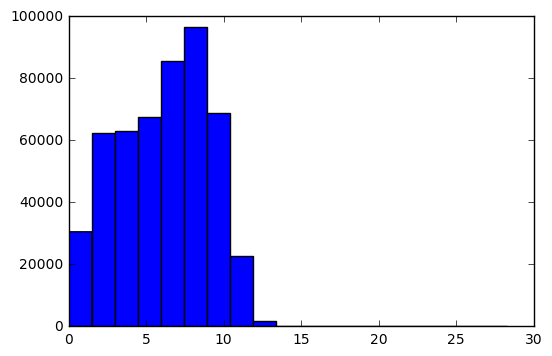

In [69]:
#hacer histogramas
#DD
d_DD, DD_bins,a= plt.hist(dis_DD,bins=bins) #organiza los datos

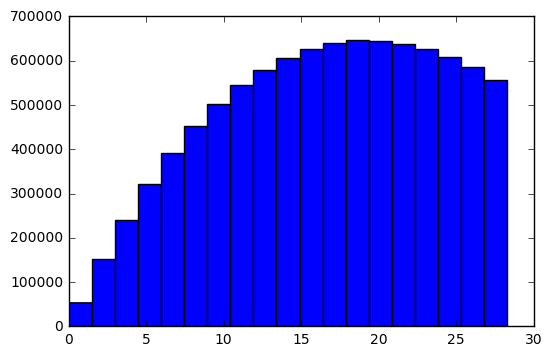

In [70]:
#hacer histogramas
#RR
d_RR, RR_bins,a= plt.hist(dis_RR,bins=bins) #organiza los datos

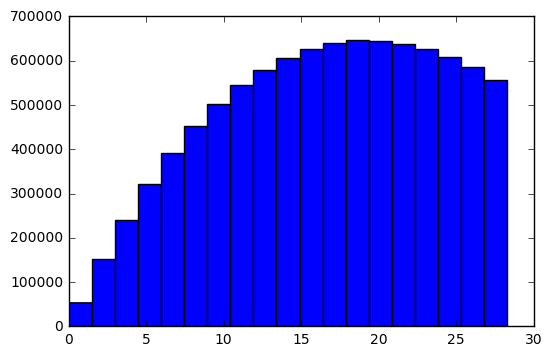

In [71]:
#hacer histogramas
#DR
d_DR, DR_bins,a= plt.hist(dis_RR,bins=bins) #organiza los datos

In [72]:
corr_D=d_DD/ND_D
corr_R=d_RR/ND_R
corr_DR=d_DR/ND_DR

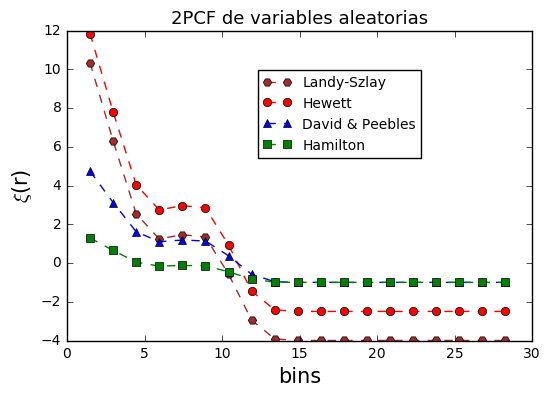

In [73]:
#funciones de correlacion
name1='Landy-Szlay'
corr1= (corr_D+corr_R-2*corr_DR)/corr_R

name2='Hewett'
corr2= (corr_D-corr_DR)/corr_R

name3='David & Peebles'
corr3= (corr_D/corr_DR)-1

name4='Hamilton'
corr4= (corr_D*corr_R)/(corr_DR)**2 -1

#Graficar

plt.plot(bins[1:],corr1,'--H',label=str(name1),color='brown')
plt.plot(bins[1:],corr2,'--o',label=str(name2),color='red')
plt.plot(bins[1:],corr3,'--g^',label=str(name3),color='blue')
plt.plot(bins[1:],corr4,'--s',label=str(name4),color='green')

plt.title('2PCF de variables aleatorias',fontsize=13)
plt.xlabel('bins',fontsize=15)
plt.ylabel(r'$\xi$(r)',fontsize=15)
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})

# Espectro de potencias

In [90]:
kmin,kmax,nk=0.0,10.0,10
x=np.linspace(0.0,20,nk)
kx=np.linspace(kmin,kmax,nk)
ky=np.linspace(kmin,kmax,nk)
V= 100.
N=nk

In [85]:
#crear pk dependiente de kx y ky
pk=[[kx for x in range(len(kx))] for y in range(len(ky))]

In [ ]:
#No se puede!!!
#calcular pk
for i in range(len(kx)):
    for i in range(i+1,len(ky)):
        n_pk[i][j]=V*((1/N)*np.sum(1j*(pk[i]*x[i]+pk[j]*x[j]))**2 )-V/N